In [3]:
!pip install -r C:\Users\Rahul\Downloads\requirements.txt
!pip install fbprophet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install statsmodels
import statsmodels.api as sm
from fbprophet import Prophet

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 22})

  Using cached cmdstanpy-0.9.68-py3-none-any.whl (49 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Rahul\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Rahul\\AppData\\Local\\Temp\\pip-install-k_hbxdgk\\fbprophet\\setup.py'"'"'; __file__='"'"'C:\\Users\\Rahul\\AppData\\Local\\Temp\\pip-install-k_hbxdgk\\fbprophet\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Rahul\AppData\Local\Temp\pip-wheel-bu0z7mh0'
       cwd: C:\Users\Rahul\AppData\Local\Temp\pip-install-k_hbxdgk\fbprophet\
  Complete output (11 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  Importing plotly failed. Interactive plots will not work.
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f5236004a3fd5b8429270d00efc

ModuleNotFoundError: No module named 'fbprophet'

In [4]:
constant_ts = np.ones(200)

In [5]:
def plot_ts(input_ts):
    plt.plot(input_ts)
    plt.xlabel('Time, $t$')
    plt.grid(True)
    plt.show()

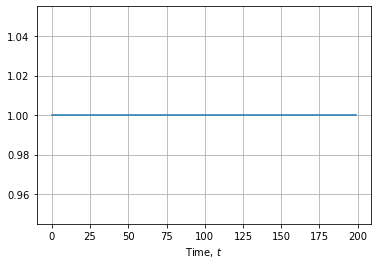

In [6]:
plot_ts(constant_ts)

In [7]:
ACF = np.correlate(constant_ts, constant_ts, mode='full')

In [8]:
def plot_ACF(ACF):
    plt.plot(range(-int(len(ACF)/2), int(len(ACF)/2)+1), ACF)
    plt.xlabel('Autocorrelation lags')
    plt.ylabel('ACF')
    plt.grid(True)
    plt.show()

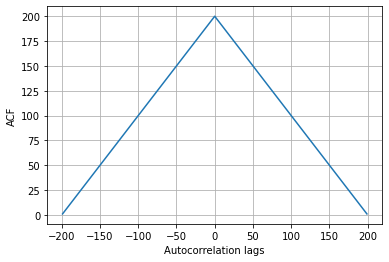

In [9]:
plot_ACF(ACF)

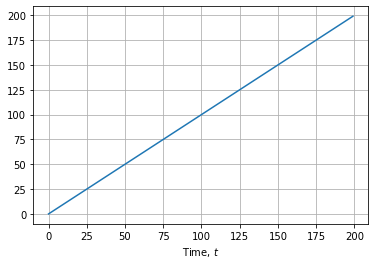

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]


In [10]:
linear_ts =np.arange(200)
plot_ts(linear_ts)
print(linear_ts)

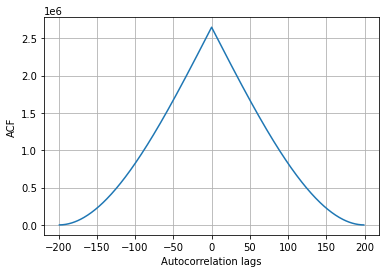

In [13]:
plot_ACF(np.correlate(linear_ts, linear_ts, mode='full'))

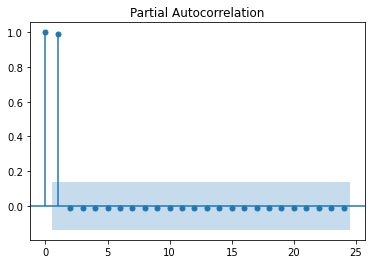

In [14]:
#PARTIAL CORRELATION
sm.graphics.tsa.plot_pacf(linear_ts)
plt.show()

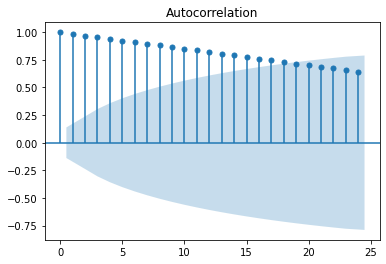

In [15]:
#autocorrelation using statsmodel library                     #whats the actual significance
sm.graphics.tsa.plot_acf(np.arange(200))
plt.show()

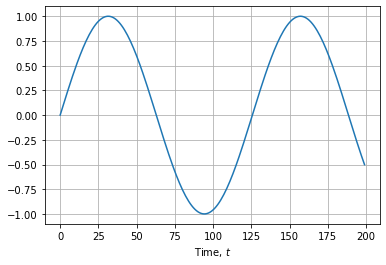

In [16]:
# interesting data with periodicity
sin_ts =np.sin(np.arange(0, 10, .05))
plot_ts(sin_ts)

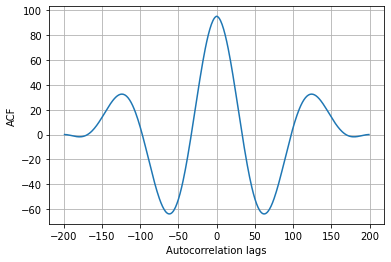

In [17]:
plot_ACF(np.correlate(sin_ts, sin_ts, mode='full'))

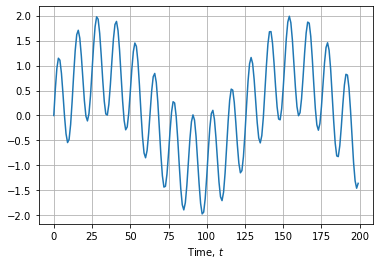

In [18]:
mixed_ts =np.sin(np.arange(0, 10, .05)) + np.sin(np.arange(0, 100, .5))
plot_ts(mixed_ts)

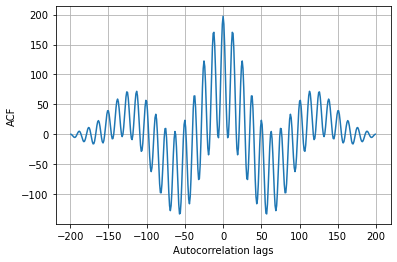

In [19]:
plot_ACF(np.correlate(mixed_ts, mixed_ts, mode='full'))

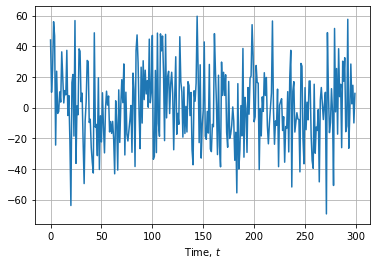

In [25]:
np.random.seed(0)
noise_ts =np.random.normal(0, 25, 300)
plot_ts(noise_ts)

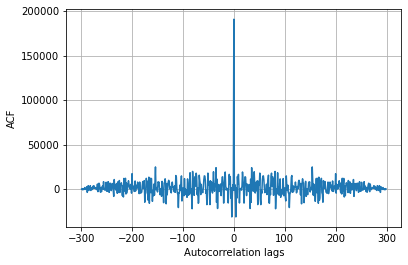

In [22]:
plot_ACF(np.correlate(noise_ts, noise_ts, mode='full'))

In [28]:
#entering into the decomposition analysis 

from statsmodels.tsa.seasonal import STL


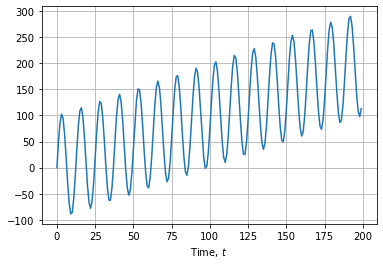

In [29]:
rising_sin_ts = 100*np.sin(np.arange(0,100,.5)) +linear_ts
plot_ts(rising_sin_ts)

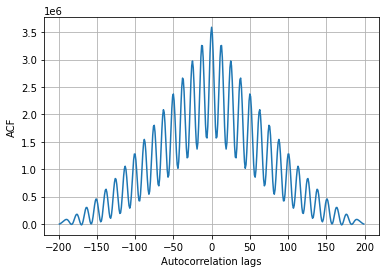

In [30]:
plot_ACF(np.correlate(rising_sin_ts, rising_sin_ts, mode='full'))

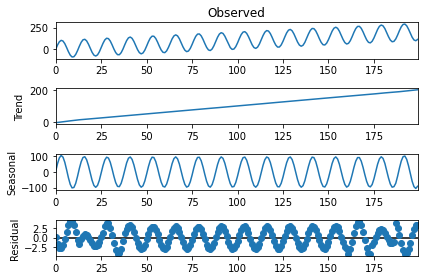

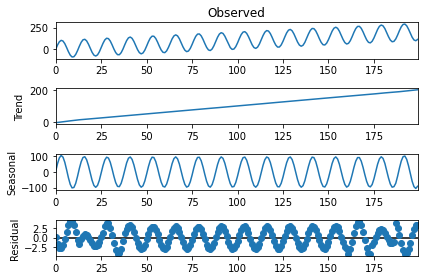

In [35]:
result = STL(rising_sin_ts, period=13).fit()
result.plot()

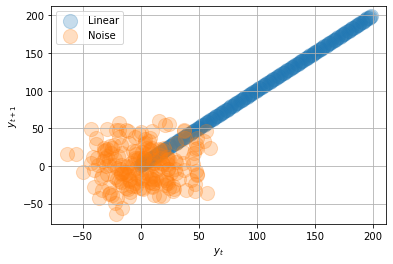

In [58]:
#creating scatter plots
plt.scatter(linear_ts[0:-1], linear_ts[1:], s=200, alpha=.25, label='Linear')     #time steps 
plt.scatter(noise_ts[0:-1], noise_ts[1:], s=200, alpha=.25, label ='Noise')
plt.xlabel('$y_t$')
plt.ylabel('$y_{t+1}$')
plt.grid(True)
plt.legend()
plt.show()

In [70]:
!pip install librosa                #applying STFT to sine wave and noise

  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23146 sha256=b55b3314e8f2a6fc249b9867811e2d3adaaf79634f589adc75fb452328366af1
  Stored in directory: c:\users\rahul\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320724 sha256=d93e7499fd16e5d37e17ad9f432bf426e72c4b04dba7a5ce50f401289540e918
  Stored in directory: c:\users\rahul\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built audioread resampy


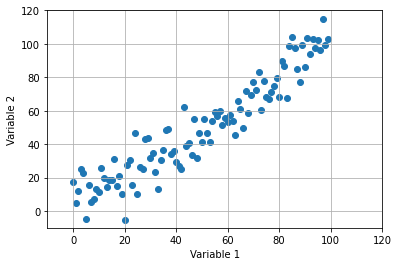

In [37]:
#understanding the influence of exogenous variables(user behaviour and ambient conditions)

np.random.seed(0)
signal1 = np.arange(100)
signal2 = np.arange(100) +np.random.normal(0, 10, 100)
plt.scatter(signal1, signal2)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.xlim(-10, 120)
plt.ylim(-10, 120)
plt.show()


In [77]:
np.corrcoef(signal1, signal2)            #what does mode='full' do?

array([[1.        , 0.94129622],
       [0.94129622, 1.        ]])

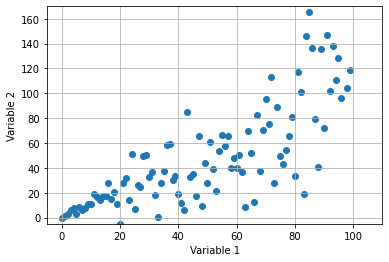

In [83]:
#increasing the noice 
np.random.seed(0)
signal1 = np.arange(100)
signal2 = np.arange(100) + np.random.normal(0, .5, 100)*np.arange(100)
plt.scatter(signal1, signal2)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.xlim(-5, 110)
plt.ylim(-5, 170)
plt.show()

In [81]:
np.corrcoef(signal1,signal2)

array([[1.        , 0.77799064],
       [0.77799064, 1.        ]])

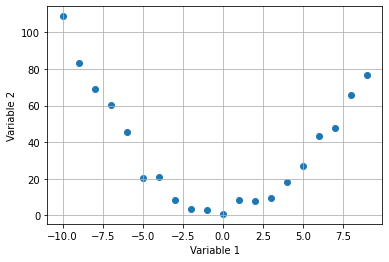

In [45]:
#non linear relationship
np.random.seed(0)
signal1 = np.arange(-10, 10)
signal2 = np.arange(-10, 10) **2 + np.random.normal(0, 5, 20)
plt.scatter(signal1, signal2)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.show()

In [85]:
np.corrcoef(signal1, signal2)

array([[ 1.        , -0.24115522],
       [-0.24115522,  1.        ]])

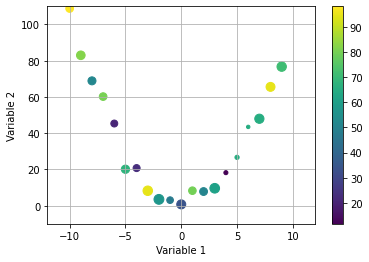

In [43]:
#intermezzo visualization
np.random.seed(0)
sizes = np.random.uniform(10, 100, len(signal1))
colors = np.random.uniform(10, 100, len(signal1))
plt.scatter(signal1, signal2, s=sizes, c=colors)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.colorbar()
plt.xlim(-12, 12)
plt.ylim(-10, 110)
plt.grid(True)
plt.show()

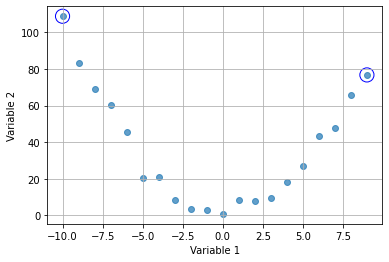

In [60]:
idx = [np.argmin(signal1), np.argmax(signal1)]                               #idx functionality
highlights = np.array([signal1[idx], signal2[idx]]).T
plt.scatter(signal1, signal2, alpha =0.7)
plt.scatter(highlights[:, 0], highlights[:, 1], facecolors='none', edgecolors ='b', s=200)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.show()

In [61]:
[np.argmin(signal1), np.argmax(signal1)]

[0, 19]

In [63]:
signal1[idx]

array([-10,   9])

In [67]:
signal2[idx]

array([108.82026173,  76.7295213 ])